### Problem Statement:

**Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.**

Aim : You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

Dataset:

Train dataset - `Flight_Data_Train.xlsx`
Test Dataset - `Flight_Test_set.xlsx`    

In [70]:
#Importing Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Loading the train dataset
data = pd.read_excel('Flight_Data_Train.xlsx')
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [71]:
#Loading the test dataset
test_data = pd.read_excel('Flight_Test_set.xlsx')
test_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


### Exploratory Data Analysis

In [72]:
print('Shape of Train data :', data.shape)
print("Shape of Test data :", test_data.shape)

Shape of Train data : (10683, 11)
Shape of Test data : (2671, 10)


We have 10683 rows and 11 columns in training dataset. Also we have 2671 rows and 10 columns in test dataset.

In [73]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We have integer and object type of data in the training data

In [74]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

We only have object type of data in test data.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We have 10683 non null values in columns except the column ['Route', 'Total_Stops']

In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We have 2671 non null values in all the columns

In [77]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [78]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

### Features in Dataset(Independent Variable)

`Airline` : The name of the airline.

`Date_of_Journey` : The date of the journey

`Source` : The source from which the service begins.

`Destination` : The destination where the service ends.

`Route` : The route taken by the flight to reach the destination.

`Dep_Time` : The time when the journey starts from the source.

`Arrival_Time` : Time of arrival at the destination.

`Duration` : Total duration of the flight.

`Total_Stops` : Total stops between the source and destination.

`Additional_Info` : Additional information about the flight

### Target in dataset(Dependent Variable)

`Price` : The price of the ticket

### Feature Engineering

The columns ['Date_of_Journey', 'Dep_Time', 'Arrival_Time'] are not in date time format. We can convert the data in these columns to date time format.

In [79]:
#Converting the datatype of date and time columns in train data.
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y')
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [80]:
#Converting the datatypes of date and time columns in test data.
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y')
test_data['Dep_Time'] = pd.to_datetime(test_data['Dep_Time'])
test_data['Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'])

Since the data is only given for the year, 2019 we can split the date and month from the column 'Date_of_Journey' and add to the dataset.

In [81]:
#Extracting the day and month from column 'Day_of_Journey' as new columns in the train dataset.
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month

#Extracting the hour and minutes from the columns ['Dep_Time', 'Arrival_Time'] as new columns in the train dataset.
data['Dep_Time_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Time_Minute'] = data['Dep_Time'].dt.minute

data['Arrival_Time_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_Minute'] = data['Arrival_Time'].dt.minute

In [82]:
#Extracting the day and month from column 'Day_of_Journey' as new columns in the test dataset.
test_data['Day_of_Journey'] = test_data['Date_of_Journey'].dt.day
test_data['Month_of_Journey'] = test_data['Date_of_Journey'].dt.month

#Extracting the hour and minutes from the columns ['Dep_Time', 'Arrival_Time'] as new columns in the test dataset.
test_data['Dep_Time_Hour'] = test_data['Dep_Time'].dt.hour
test_data['Dep_Time_Minute'] = test_data['Dep_Time'].dt.minute

test_data['Arrival_Time_Hour'] = test_data['Arrival_Time'].dt.hour
test_data['Arrival_Time_Minute'] = test_data['Arrival_Time'].dt.minute

Since we have taken the month and day from the column 'Date_of_Journey' and hour and minutes from the columns ['Dep_Time', 'Arrival_Time'] we can drop these columns from the train and test data.

In [83]:
#Dropping columns from train data
data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)

#dropping columns from test data
test_data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)

Converting the values in column 'Duration' into minutes for easy calcuation

In [84]:
import numpy as np
import datetime

#Train Data

#Changing the format of the values for timedelta
for i in range(0,len(data.Duration)):
    data.Duration[i] = data.Duration[i].replace('h',':').replace(' ','').replace('m',':00')

#Changing the datatype to timedelta
data['Duration'] = pd.to_timedelta(np.where(data['Duration'].str.count(':') ==1, data['Duration']+'00:00',data['Duration']))

#Converting the value to minutes
for i in range(0,len(data.Duration)):
    data.Duration[i] = (data.Duration[i].total_seconds())/60
    
data['Duration'] = data['Duration'].astype('int64')

In [85]:
#Test data

#Changing the format of the values for timedelta
for i in range(0,len(test_data.Duration)):
    test_data.Duration[i] = test_data.Duration[i].replace('h',':').replace(' ','').replace('m',':00')

#Changing the datatype to timedelta
test_data['Duration'] = pd.to_timedelta(np.where(test_data['Duration'].str.count(':') ==1, test_data['Duration']+'00:00',test_data['Duration']))

#Converting the value to minutes
for i in range(0,len(test_data.Duration)):
    test_data.Duration[i] = (test_data.Duration[i].total_seconds())/60
    
test_data['Duration'] = test_data['Duration'].astype('int64')

In [86]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration                int64
Total_Stops            object
Additional_Info        object
Price                   int64
Day_of_Journey          int64
Month_of_Journey        int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
dtype: object

In [87]:
test_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration                int64
Total_Stops            object
Additional_Info        object
Day_of_Journey          int64
Month_of_Journey        int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
dtype: object

In [88]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [89]:
test_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


We have converted the datetime values in the dataset to integers

In [90]:
data.shape

(10683, 14)

In [91]:
test_data.shape

(2671, 13)

### Exploring the categorical Variables in the dataset

In [92]:
#User defined function to print the count of each uniaue values in each columns in Train data.
def val_c(col):
    print(data[col].value_counts())

In [93]:
#User defined function to print the count of each uniaue values in each columns in Test data.
def val_c_test(col):
    print(test_data[col].value_counts())

In [94]:
val_c('Airline')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [95]:
val_c('Source')

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [96]:
val_c('Destination')

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [97]:
val_c('Route')

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → COK → MAA → HYD             1
BOM → BLR → CCU → BBI → HYD       1
BOM → JAI → DEL → HYD             1
BOM → CCU → HYD                   1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 128, dtype: int64


In [98]:
val_c('Total_Stops')

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [99]:
val_c('Additional_Info')

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [100]:
#Test data
val_c_test('Airline')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


In [101]:
val_c_test('Source')

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [102]:
val_c_test('Destination')

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [103]:
val_c_test('Route')

DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BLR → NAG → DEL            1
CCU → PAT → BLR            1
BLR → BOM → IDR → DEL      1
CCU → BOM → TRV → BLR      1
BOM → IXC → DEL → HYD      1
Name: Route, Length: 100, dtype: int64


In [104]:
val_c_test('Total_Stops')

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


In [105]:
val_c_test('Additional_Info')

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64


In [106]:
#We can see that in column 'Destination', same city is mentioned in new and old name in train and test data

data['Destination'] = data['Destination'].replace('Delhi','New Delhi')

test_data['Destination'] = test_data['Destination'].replace('Delhi','New Delhi')

#In train data the column 'Additional Info' is having the same category in two names.

data['Additional_Info'] = data['Additional_Info'].replace('No Info','No info')

In [107]:
data.nunique()

Airline                  12
Source                    5
Destination               5
Route                   128
Duration                367
Total_Stops               5
Additional_Info           9
Price                  1870
Day_of_Journey           10
Month_of_Journey          4
Dep_Time_Hour            24
Dep_Time_Minute          12
Arrival_Time_Hour        24
Arrival_Time_Minute      12
dtype: int64

In [108]:
test_data.nunique()

Airline                 11
Source                   5
Destination              5
Route                  100
Duration               319
Total_Stops              5
Additional_Info          6
Day_of_Journey          10
Month_of_Journey         4
Dep_Time_Hour           24
Dep_Time_Minute         12
Arrival_Time_Hour       24
Arrival_Time_Minute     12
dtype: int64

### Checking for Missing Values

Airline                0
Source                 0
Destination            0
Route                  1
Duration               0
Total_Stops            1
Additional_Info        0
Price                  0
Day_of_Journey         0
Month_of_Journey       0
Dep_Time_Hour          0
Dep_Time_Minute        0
Arrival_Time_Hour      0
Arrival_Time_Minute    0
dtype: int64


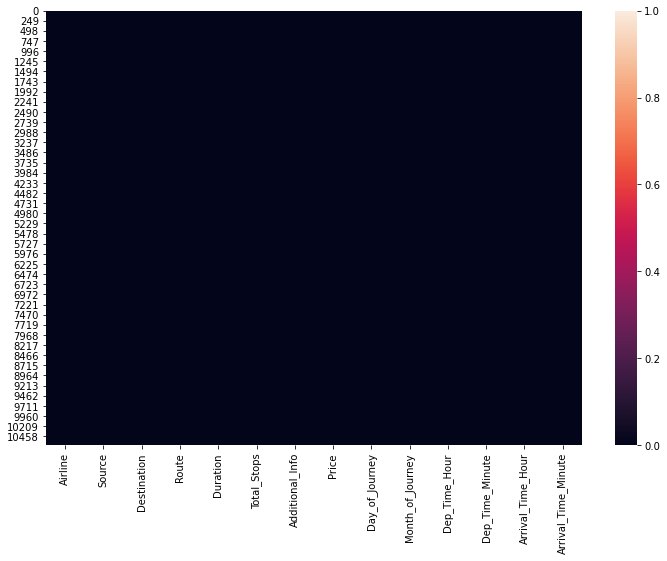

In [109]:
#Train data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [12,8])
sns.heatmap(data.isnull())
print(data.isnull().sum())

Airline                0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Day_of_Journey         0
Month_of_Journey       0
Dep_Time_Hour          0
Dep_Time_Minute        0
Arrival_Time_Hour      0
Arrival_Time_Minute    0
dtype: int64


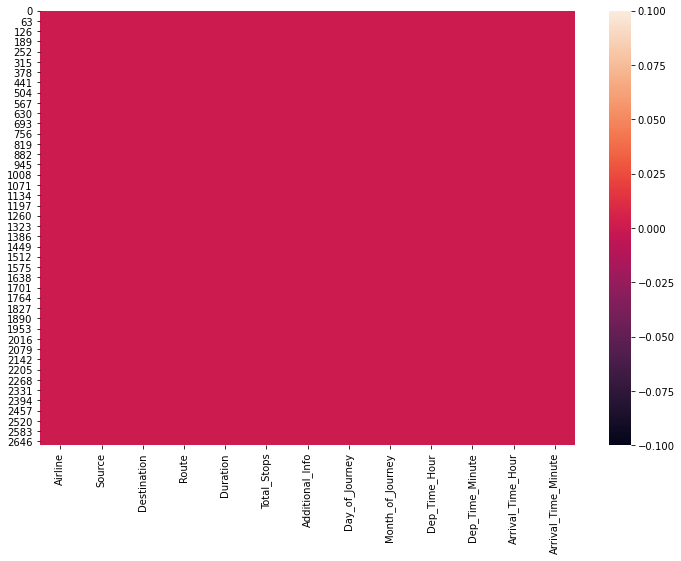

In [110]:
#Test data
plt.figure(figsize = [12,8])
sns.heatmap(test_data.isnull())
print(test_data.isnull().sum())

We have missing values in column ['Route', 'Total_Stops'] in train data. We don't have any missing values in test data. Since ['Route, 'Total_Stops'] are having categorical values, we can replace the missing value with the mode of the columns.

In [111]:
data['Route'].fillna(data['Route'].mode()[0], inplace=True)
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0], inplace=True)

Airline                0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Day_of_Journey         0
Month_of_Journey       0
Dep_Time_Hour          0
Dep_Time_Minute        0
Arrival_Time_Hour      0
Arrival_Time_Minute    0
dtype: int64


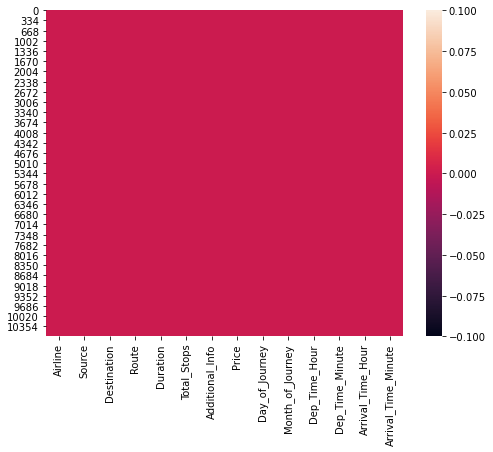

In [112]:
#Checking whether the null values are replaced with mean/mode or not.
plt.figure(figsize = [8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum())

The null values from the train data has been replaced with mode value of the columns.

### Data Visualization

We can check the variable relations of train data.

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


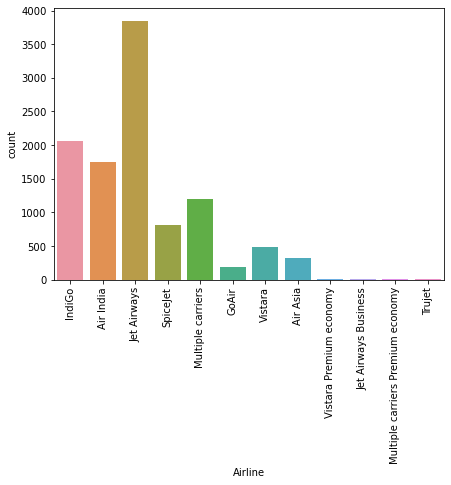

In [113]:
plt.figure(figsize = [7,5])
print(data['Airline'].value_counts(ascending = False))
sns.countplot(data['Airline'])
plt.xticks(rotation = 90)
plt.show()

From the above observations, most of the passengers have travelled in Jet Airways airlines.

<AxesSubplot:xlabel='Source', ylabel='count'>

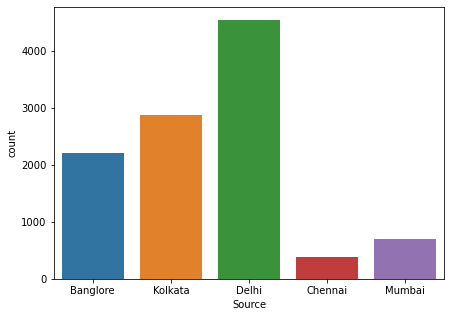

In [114]:
plt.figure(figsize = [7,5])
sns.countplot(data['Source'])

From the above observations, most of the passengers travelled from Delhi Airport.

<AxesSubplot:xlabel='Destination', ylabel='count'>

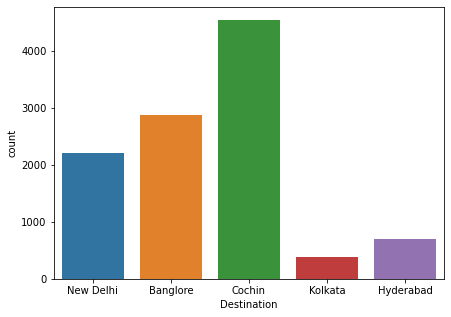

In [46]:
plt.figure(figsize = [7,5])
sns.countplot(data['Destination'])

From the above observations, most of the passengers, travelled to Cochin Airport.

(array([1923, 2694,  957, 1816, 1111, 2182], dtype=int64), array([ 1.        ,  5.33333333,  9.66666667, 14.        , 18.33333333,
       22.66666667, 27.        ]))


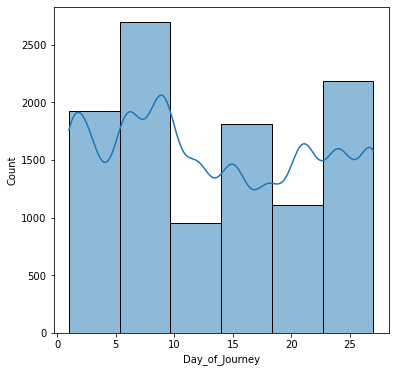

In [117]:
plt.figure(figsize=[6,6])
sns.histplot(data['Day_of_Journey'],bins =6,kde=True)
print(np.histogram(data['Day_of_Journey'],bins=6))

From the above observations, most of the passengers traveled in flights between 5-10 and 27-30 of a month.

(array([2724, 1079, 3466, 3414], dtype=int64), array([3.  , 3.75, 4.5 , 5.25, 6.  ]))


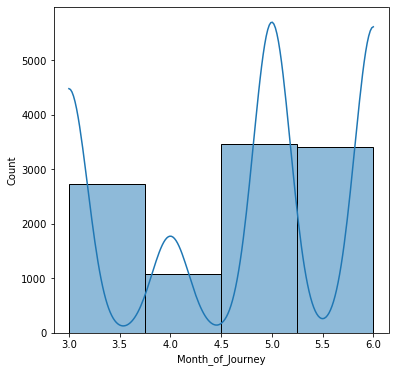

In [119]:
plt.figure(figsize=[6,6])
sns.histplot(data['Month_of_Journey'],bins =4,kde=True)
print(np.histogram(data['Month_of_Journey'],bins=4))

From the above observations, most of the passengers traveled in flight during the month, June and July.

(array([ 295, 2353, 2729, 1437, 2178, 1691], dtype=int64), array([ 0.        ,  3.83333333,  7.66666667, 11.5       , 15.33333333,
       19.16666667, 23.        ]))


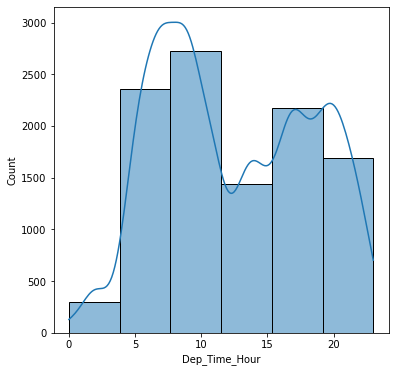

In [122]:
plt.figure(figsize=[6,6])
sns.histplot(data['Dep_Time_Hour'],bins =6,kde=True)
print(np.histogram(data['Dep_Time_Hour'],bins=6))

From the above observations, most of the passengers, traveled in flight during the morning rather than at night.

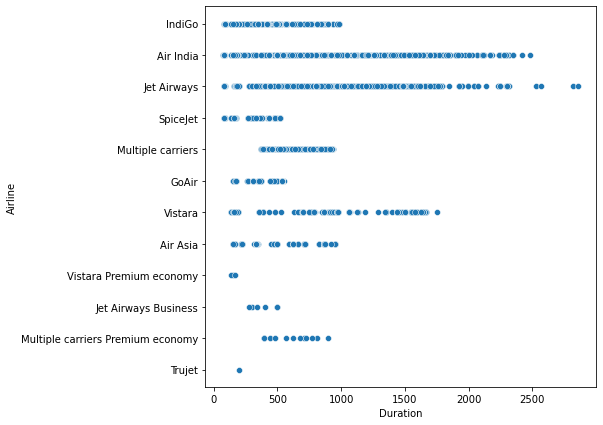

In [123]:
plt.figure(figsize = [7,7])
sns.scatterplot('Duration','Airline', data = data)
plt.show()

From the above observations, the Jet Airways is having higher duration of journey.

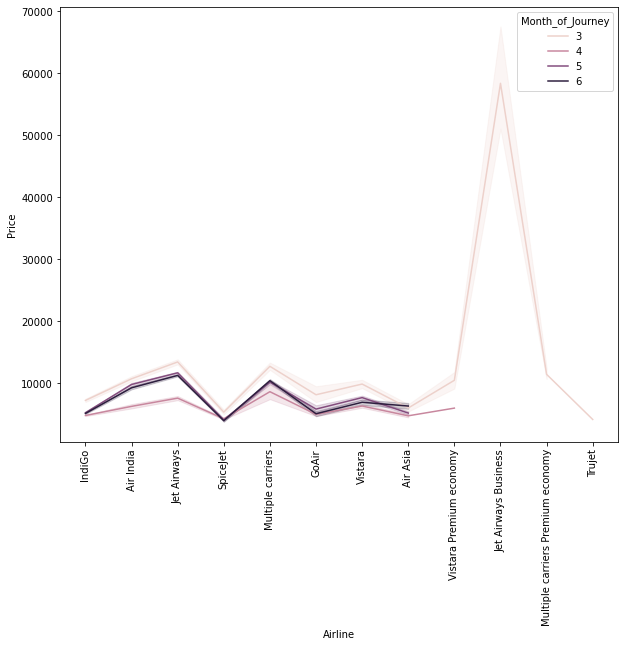

In [124]:
plt.figure(figsize = [10,8])
sns.lineplot('Airline','Price', data = data, hue = 'Month_of_Journey')
plt.xticks(rotation = 90)
plt.show()

From the above observations, the highest flight travelling price is during the month of March and April for Jet Airways Business.

<AxesSubplot:xlabel='Price', ylabel='Month_of_Journey'>

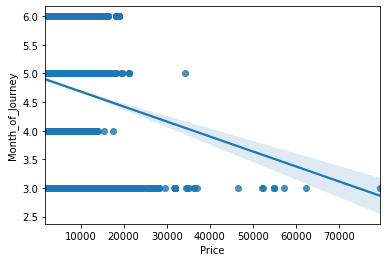

In [125]:
sns.regplot('Price','Month_of_Journey', data = data)

From the above observations, the price of flight ticket is high during March and April. The price of flight is low during the month May and June

<AxesSubplot:xlabel='Price', ylabel='Day_of_Journey'>

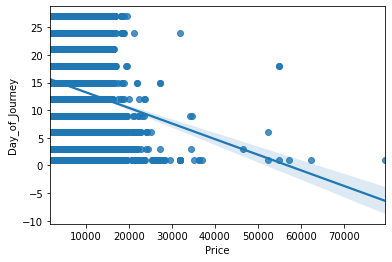

In [126]:
sns.regplot('Price','Day_of_Journey', data = data)

From the above observations, the price of flight is higher during the start of a month.

### Statistical Summary

### Describe of the data

In [127]:
data.describe()

,Duration,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.120846,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630
std,507.835322,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036
min,75.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

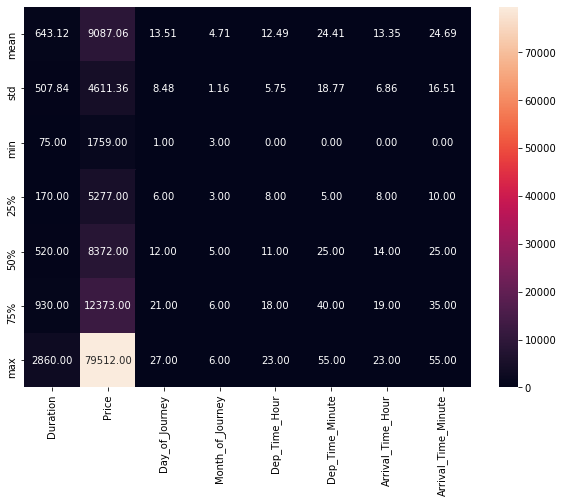

In [128]:
plt.figure(figsize=[10,7])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

Observations:
    
1. The columns ['Duration', 'Price' ,'Day_of_Journey', Dep_Time_Hour'] are having higher mean value than the median value. That means skewness is present in the data of theese columns.
2. There is huge difference between the 75% and the maximum value of columns ['Duration', 'Price']. That means possible outliers are present in the data of these columns.

### Correlation

In [129]:
Correlation = data.corr()
Correlation

,Duration,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
Duration,1.000000,0.506495,-0.022612,0.014791,0.002035,-0.018865,0.051458,-0.069557
Price,0.506495,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155
Day_of_Journey,-0.022612,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511
Month_of_Journey,0.014791,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626
Dep_Time_Hour,0.002035,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909
Dep_Time_Minute,-0.018865,-0.024492,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594
Arrival_Time_Hour,0.051458,0.024264,-0.003192,-0.003941,0.005215,0.043054,1.000000,-0.154362
Arrival_Time_Minute,-0.069557,-0.086155,-0.017511,-0.100626,0.067909,-0.017594,-0.154362,1.000000


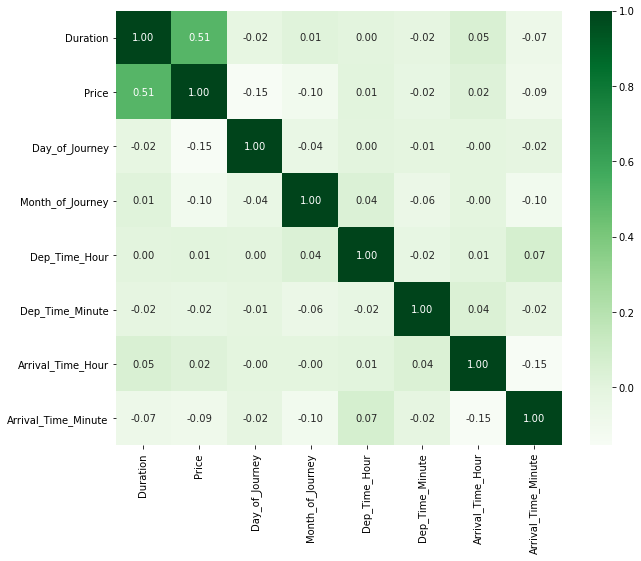

In [130]:
#Plotting the correlation of columns
plt.figure(figsize=[10,8])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='Greens')
plt.show()

### Correlation with Target Variable

Duration               0.506495
Arrival_Time_Hour      0.024264
Dep_Time_Hour          0.006819
Dep_Time_Minute       -0.024492
Arrival_Time_Minute   -0.086155
Month_of_Journey      -0.103651
Day_of_Journey        -0.153738
Name: Price, dtype: float64


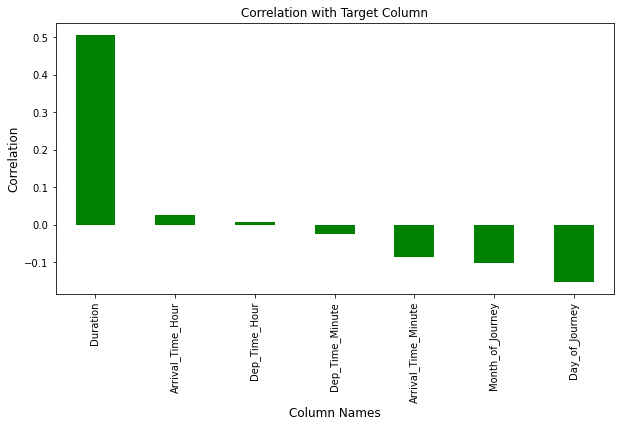

In [131]:
print(Correlation['Price'].drop('Price').sort_values(ascending = False))
plt.figure(figsize = [10,5])
Correlation['Price'].sort_values(ascending= False).drop('Price').plot(kind = 'bar', color ='g')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:

1. Except the column ['Duration', 'Arrival_Time_Hour', 'Dep_Time_Hour'] rest of the columns are having negative correlation with the target variable.
2. The column 'Duration is having highest positive correlation with the target variable 'Price'. The column 'Day_of_Journey' is having highest negative correlation with the target variable 'Price'.
3. The column 'Dep_Time_Hour' is having the least positive correlation with the target variable 'Price'. The column 'Dep_Time_Minute' is having least negative correlation with the target variable.

### Distribution of data in columns

Skewness is only considered for continuous data. So we can group the columns containing continuous data.

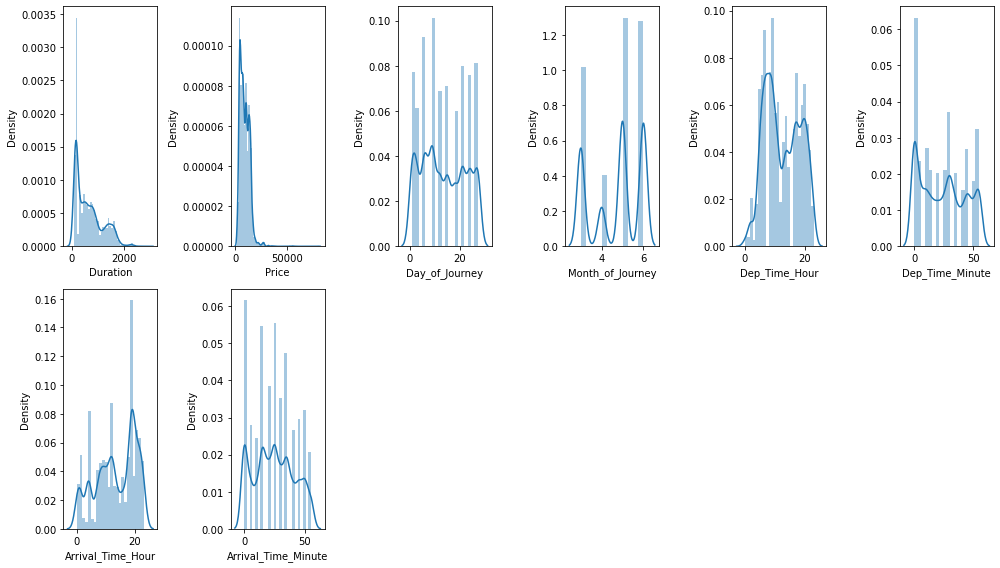

In [132]:
cols = data.drop(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info'], axis = 1).copy()

plt.figure(figsize = [14,8])
for i in range(0,len(cols.columns.values)):
    plt.subplot(2,6,i+1)
    sns.distplot(cols[cols.columns.values[i]])
    plt.tight_layout()

We can see that none of the columns are having normally distributed data. Skewness is present in all the columns.

### Skewness

In [133]:
Skewness = data.skew()
Skewness.sort_values(ascending = False)

Price                  1.812552
Duration               0.861203
Dep_Time_Minute        0.167029
Day_of_Journey         0.118351
Dep_Time_Hour          0.113073
Arrival_Time_Minute    0.110945
Arrival_Time_Hour     -0.369988
Month_of_Journey      -0.387493
dtype: float64

From the above observations, high skewness is present in columns ['Price','Duration']. But the column 'Price' is our target column.

### Checking the presence of outliers

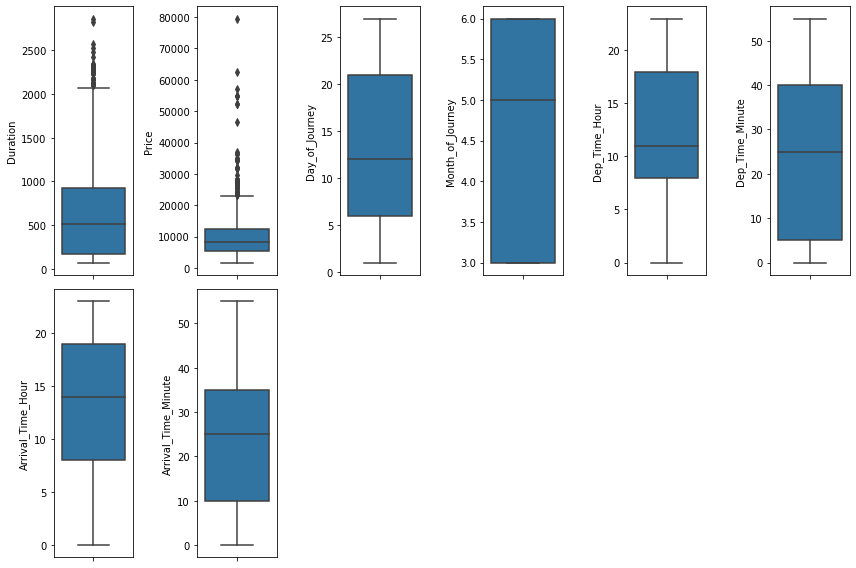

In [134]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [12,8])
for i in range(0,len(cols.columns.values)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y = cols[cols.columns.values[i]])
    plt.tight_layout()

### Data Cleaning

### Removing the Skewness

In [135]:
#train data
x = data.drop(['Price'],axis = 1)
y = data['Price']
print(x.shape)
print(y.shape)

(10683, 13)
(10683,)


In [136]:
#We can set the skewness standard limit as +/-0.5.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Duration    0.861203
dtype: float64

Here the column 'Duration' is only having skewness beyond the standard limit. Let's remove the skewness of this column.

In [137]:
from sklearn.preprocessing import power_transform

x['Duration'] = power_transform(x['Duration'].values.reshape(-1,1))

In [138]:
x.skew().sort_values(ascending = False)

Dep_Time_Minute        0.167029
Day_of_Journey         0.118351
Dep_Time_Hour          0.113073
Arrival_Time_Minute    0.110945
Duration              -0.044838
Arrival_Time_Hour     -0.369988
Month_of_Journey      -0.387493
dtype: float64

The skewness of the column 'Duration' is removed.

In [139]:
#test data
x1 = test_data.copy()
print(x1.shape)

(2671, 13)


In [140]:
#We can set the skewness standard limit as +/-0.5.
x1.skew().sort_values(ascending=False)[np.abs(x1.skew())>0.5]

Duration    0.896658
dtype: float64

Here the columns 'Duration' is having skewness beyond the standard limit. Let's remove the skewness of data of the column.

In [141]:
x1['Duration'] = power_transform(x1['Duration'].values.reshape(-1,1))

In [142]:
x1.skew().sort_values(ascending = False)

Day_of_Journey         0.199540
Dep_Time_Minute        0.128515
Arrival_Time_Minute    0.115267
Dep_Time_Hour          0.093759
Duration              -0.047793
Month_of_Journey      -0.403700
Arrival_Time_Hour     -0.443166
dtype: float64

### Removing the Outliers

#### Using ZScore method

In [145]:
#Train data
from scipy.stats import zscore
df = pd.DataFrame({})
df['Duration'] = x['Duration'].copy()   #Columns with outliers
df['Price'] = y.copy()
z = np.abs(zscore(df))
z

array([[1.06307688, 1.12554821],
       [0.05745582, 0.30904789],
       [1.04393124, 1.03985835],
       ...,
       [1.00656068, 0.40295085],
       [1.1225895 , 0.77224576],
       [0.07240063, 0.57815073]])

In [146]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,Duration,Price
0,-1.063077,3897
1,-0.057456,7662
2,1.043931,13882
3,-0.398754,6218
4,-0.537629,13302
...,...,...
10678,-1.185459,4107
10679,-1.153580,4145
10680,-1.006561,7229
10681,-1.122590,12648


In [147]:
df['Airline'] = x['Airline']
df['Source'] = x['Source']
df['Destination'] = x['Destination']
df['Route'] = x['Route']
df['Total_Stops'] = x['Total_Stops']
df['Additional_Info'] = x['Additional_Info']
df['Day_of_Journey'] = x['Day_of_Journey']
df['Month_of_Journey'] = x['Month_of_Journey']
df['Dep_Time_Hour'] = x['Dep_Time_Hour']
df['Dep_Time_Minute'] = x['Dep_Time_Minute']
df['Arrival_Time_Hour'] = x['Arrival_Time_Hour']
df['Arrival_Time_Minute'] = x['Arrival_Time_Minute']

df.shape

(10683, 14)

In [148]:
df_new['Airline'] = x['Airline']
df_new['Source'] = x['Source']
df_new['Destination'] = x['Destination']
df_new['Route'] = x['Route']
df_new['Total_Stops'] = x['Total_Stops']
df_new['Additional_Info'] = x['Additional_Info']
df_new['Day_of_Journey'] = x['Day_of_Journey']
df_new['Month_of_Journey'] = x['Month_of_Journey']
df_new['Dep_Time_Hour'] = x['Dep_Time_Hour']
df_new['Dep_Time_Minute'] = x['Dep_Time_Minute']
df_new['Arrival_Time_Hour'] = x['Arrival_Time_Hour']
df_new['Arrival_Time_Minute'] = x['Arrival_Time_Minute']


df_new.shape

(10587, 14)

In [149]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

0.8986239820275204

We are losing only 0.90% of data after removing the outliers which is not much loss of data.

In [150]:
#test data
df_test = x1.copy()
df_test = df_test.drop(['Airline','Source','Destination','Route', 'Total_Stops','Additional_Info'], axis = 1)
z1 = np.abs(zscore(df_test))
z1

array([[0.37782487, 0.83733254, 1.09474457, ..., 0.26770357, 1.36170869,
        0.02633999],
       [0.72785618, 0.11087675, 0.2405048 , ..., 0.25632445, 0.50932437,
        0.27177067],
       [1.34068552, 0.97880692, 0.2405048 , ..., 0.51833847, 0.76925212,
        1.46421332],
       ...,
       [0.1976063 , 0.83733254, 1.46797475, ..., 1.31575963, 1.36170869,
        0.02633999],
       [0.77986303, 0.83733254, 1.46797475, ..., 1.30438051, 0.76925212,
        0.56988133],
       [0.70396201, 0.25235114, 1.09474457, ..., 1.57777364, 0.76925212,
        0.56988133]])

In [151]:
threshold = 3
df_new_test = df_test[(z1<3).all(axis=1)]
df_new_test

,Duration,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,0.377825,6,6,17,30,4,25
1,-0.727856,12,5,6,20,10,20
2,1.340686,21,5,19,15,19,0
3,0.585667,21,5,8,0,21,0
4,-1.074606,24,6,23,55,2,45
...,...,...,...,...,...,...,...
2666,1.349803,6,6,20,30,20,25
2667,-1.164771,27,3,14,20,16,55
2668,-0.197606,6,3,21,50,4,25
2669,0.779863,6,3,4,0,19,15


In [152]:
df_test['Airline'] = x1['Airline']
df_test['Source'] = x1['Source']
df_test['Destination'] = x1['Destination']
df_test['Route'] = x1['Route']
df_test['Total_Stops'] = x1['Total_Stops']
df_test['Additional_Info'] = x1['Additional_Info']

df_test.shape

(2671, 13)

In [153]:
df_new_test['Airline'] = x1['Airline']
df_new_test['Source'] = x1['Source']
df_new_test['Destination'] = x1['Destination']
df_new_test['Route'] = x1['Route']
df_new_test['Total_Stops'] = x1['Total_Stops']
df_new_test['Additional_Info'] = x1['Additional_Info']

df_new_test.shape

(2671, 13)

In [154]:
data_loss_test = (df_test.shape[0]-df_new_test.shape[0])/df_test.shape[0]*100
data_loss

0.8986239820275204

Here also we are lossing only 0.90% of data after removing outliers from the test data.

### Using IQR (Inter Quantile Range) method

In [155]:
#Train data
Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
IQR=Q3 - Q1
df.drop(['Airline','Source','Destination','Route', 'Total_Stops','Additional_Info'], axis = 1,inplace = True)
df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [156]:
df_1['Airline'] = x['Airline']
df_1['Source'] = x['Source']
df_1['Destination'] = x['Destination']
df_1['Route'] = x['Route']
df_1['Total_Stops'] = x['Total_Stops']
df_1['Additional_Info'] = x['Additional_Info']

df_1.shape

(10683, 14)

In [157]:
df['Airline'] = x['Airline']
df['Source'] = x['Source']
df['Destination'] = x['Destination']
df['Route'] = x['Route']
df['Total_Stops'] = x['Total_Stops']
df['Additional_Info'] = x['Additional_Info']

df.shape

(10683, 14)

In [158]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

0.0

We are not losing any data after removing outliers. using IQR outlier removal method. So we can consider this model as it is not losing any data.

In [159]:
#Test data
Q_test1=x1.quantile(0.25)

# 3rd quantile
Q_test3=x1.quantile(0.75)

# IQR
IQR_test=Q_test3 - Q_test1
df_test.drop(['Airline','Source','Destination','Route', 'Total_Stops','Additional_Info'], axis = 1,inplace = True)
df_test_1=df_test[~((df_test < (Q_test1 - 1.5 * IQR_test)) |(df_test > (Q_test3 + 1.5 * IQR_test))).any(axis=1)]

In [160]:
df_test_1['Airline'] = x1['Airline']
df_test_1['Source'] = x1['Source']
df_test_1['Destination'] = x1['Destination']
df_test_1['Route'] = x1['Route']
df_test_1['Total_Stops'] = x1['Total_Stops']
df_test_1['Additional_Info'] = x1['Additional_Info']

df_test_1.shape

(2671, 13)

In [161]:
df_test['Airline'] = x1['Airline']
df_test['Source'] = x1['Source']
df_test['Destination'] = x1['Destination']
df_test['Route'] = x1['Route']
df_test['Total_Stops'] = x1['Total_Stops']
df_test['Additional_Info'] = x1['Additional_Info']

df_test.shape

(2671, 13)

In [162]:
data_loss = (df_test.shape[0]-df_test_1.shape[0])/df_test.shape[0]*100
data_loss

0.0

We are not losing any data after removing outliers. using IQR outlier removal method. So we can consider this model as it is not losing any data.

### Encoding the categorical columns in Train and Test data.

In [163]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

#Encoding columns with categorical values in train data.
for i in df_1.loc[:,['Airline','Source','Destination','Route', 'Total_Stops','Additional_Info']].columns:
    df_1[i] = enc.fit_transform(df_1[i].values.reshape(-1,1))
    
#Encoding columns with categorical values in test data.
for i in df_test_1.loc[:,['Airline','Source','Destination','Route', 'Total_Stops','Additional_Info']].columns:
    df_test_1[i] = enc.fit_transform(df_test_1[i].values.reshape(-1,1))

### Checking the Multicolinearity of variables in the dataframe

In [164]:
#train data
x = df_1.drop('Price',axis = 1)
y = df_1['Price']
c = x.columns
print(x.shape)
print(y.shape)

(10683, 13)
(10683,)


In [165]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)
x

,Duration,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,-1.063077,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.410675,-1.658441,1.738764,-1.547183,1.407309,0.49862
1,-0.057456,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-1.260999,0.890052,-1.026434,0.249876,-0.253632,0.49862
2,1.043931,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,0.014486,0.040555,-0.335134,1.175633,-0.253632,0.49862
3,-0.398754,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.410675,0.890052,-1.026434,0.440473,-0.807278,0.49862
4,-0.537629,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.410675,-1.658441,1.738764,-1.247673,-0.807278,0.49862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.185459,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,-1.686161,0.890052,-1.026434,-0.294688,1.407309,0.49862
10679,-1.153580,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,-1.260999,0.890052,-1.026434,-0.294688,1.407309,0.49862
10680,-1.006561,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,0.014486,-1.658441,1.738764,-1.547183,1.407309,0.49862
10681,-1.122590,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,2.565458,-1.658441,1.738764,-1.547183,1.407309,0.49862


In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [167]:
calc_vif(x)

,Column Name,VIF Factor
0,Duration,2.894710
1,Day_of_Journey,1.020101
2,Month_of_Journey,1.123424
3,Dep_Time_Hour,1.037301
4,Dep_Time_Minute,1.021628
5,Arrival_Time_Hour,1.039096
6,Arrival_Time_Minute,1.103153
7,Airline,1.058563
8,Source,4.308938
9,Destination,6.614967


All the columns except the column 'Destination' is not having much variance of inflation. Since there is not much multicolinearity is present in the column 'Destination', we are not dropping this column from the train data.

In [168]:
#test data
x1 = df_test_1
c1 = x1.columns
print(x1.shape)

(2671, 13)


In [169]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x1)
x1 = pd.DataFrame(x1,columns = c1)
x1

,Duration,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,0.377825,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340,0.011908,0.032567,-0.334795,0.797952,-0.792411,0.480394
1,-0.727856,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771,-0.423779,0.877086,-1.027464,0.392406,-0.792411,0.480394
2,1.340686,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213,0.011908,0.032567,-0.334795,0.797952,-0.792411,-2.148975
3,0.585667,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213,0.883281,0.032567,-0.334795,0.797952,-0.792411,0.480394
4,-1.074606,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783,-1.730840,-1.656471,1.743214,-1.414118,1.435515,0.480394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.349803,-0.837333,1.094745,1.300913,0.267704,0.911316,0.026340,-1.295153,0.877086,-1.027464,-0.123744,-0.792411,0.480394
2667,-1.164771,1.705263,-1.467975,0.245617,-0.256324,0.343060,1.815004,-0.423779,0.877086,-1.027464,-0.418687,1.435515,0.480394
2668,-0.197606,-0.837333,-1.467975,1.476795,1.315760,-1.361709,0.026340,0.011908,0.032567,-0.334795,0.797952,-0.792411,0.480394
2669,0.779863,-0.837333,-1.467975,-1.513210,-1.304381,0.769252,-0.569881,-1.295153,0.032567,-0.334795,0.797952,-0.792411,0.480394


In [170]:
#User defined function to calculate variance of inflation in test data.
def calc_vif_test(x1):
    vif = pd.DataFrame()
    vif['Column Name'] = x1.columns
    vif['VIF Factor'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [171]:
calc_vif_test(x1)

,Column Name,VIF Factor
0,Duration,2.826503
1,Day_of_Journey,1.016839
2,Month_of_Journey,1.132740
3,Dep_Time_Hour,1.052618
4,Dep_Time_Minute,1.034311
5,Arrival_Time_Hour,1.034446
6,Arrival_Time_Minute,1.123838
7,Airline,1.076831
8,Source,4.167401
9,Destination,6.257361


All the columns except the column 'Destination' is not having much variance of inflation. Since there is not much multicolinearity is present in the column 'Destination', we are not dropping this column from the test data.

In [172]:
#Steps performed till now
#1. Loaded the train and test data
#2. Checked the shape of data(rows and columns).
#3. Observed the type of data, non-null values in each variables, features and target of dataset.
#Feature Engineering
#4. Changed the format of datetime variables in the train and test data to datetime.

    #Since the data was only given for the year 2019, new columns created as 'Day_of_Journey' and 'Month_of_Journey' 
    #from the column 'Date of Journey'.
    
    #The data in columns 'Dep_Time' and 'Arrival_Time' was divided and added to dataset as new columns with hours and minutes.
    #Dep_Time = 'Dep_Time_Hour', 'Dep_Time_Minute'
    #Arrival_Time = 'Arrival_Time_Hour', 'Arrival_Time_Minute'

    #Dropping the columns ['Date_of_Journey', 'Dep_Time', 'Arrival_Time'] - Because we have created new columns with the required data.
    
#5. Converting the values in column 'Duration' from hh:mm to minutes.
#6. Exploring the categorical variables in train and test dataset.
    #Replacing the same categories in variables which are given in different names into one category for train and test data.
#7. Checking for missing values
    #Imputing the missing values in columns ['Route', 'Total_Stops'] with mode of the columns since the data is categorical.

#8. Data_Visualization of variables using countplot, histplot, scatterplot, lineplot and regplot.
#Statistical Summary
#9. Describe of the data
#10. Correlation of the data
#11. Correlation with the target variable
#12. Distribution of data in columns.
#13. Skewness
#14. Checked the presence of outliers
#Data Cleaning
#15. Removed skewness from train and test data
#16. Removed outliers
    #Performed both zscore and IQR method, in which the IQR method was performing well as we are not losing any data after
    #removing outliers using IQR method.
#17. Encoding the categorical columns
    #Ordinal encoder - For independent variables.
#18. Checked the multicolinearity of variables in train and test data.

### EDA Completed

### Building the Model

In [174]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(10683, 13)
(10683,)


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

In [176]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)
sgd = SGDRegressor()
etr = ExtraTreesRegressor()
xgb = XGBRegressor()

#### Finding the best random_state

In [177]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [178]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [179]:
best_ran(lr)

LinearRegression()
At random state  77 the model is having r2 score of  0.48031426738522087


In [180]:
mod_test(lr,77)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.48031426738522087
__________________________________________________
Mean Sqaured Error is  9970492.192665117
__________________________________________________
Mean Absolute Error is  2397.4573381684386
__________________________________________________
Coefficent is  [ 1926.72073191  -632.74377795  -524.22622172   165.49026367
   -37.08401641  -156.18168771   -60.03746717   174.16171124
   -16.18686522   386.37244992  -165.0324042  -1403.56435743
   173.57654428]
__________________________________________________
Intercept is  9067.036004270074
__________________________________________________


#### KNeighborsRegressor

In [181]:
best_ran(knn)

KNeighborsRegressor()
At random state  32 the model is having r2 score of  0.8142181792881935


In [182]:
mod_test(knn,32)

KNeighborsRegressor()
R2 score is  0.8142181792881935
__________________________________________________
Mean Sqaured Error is  3705636.1552456715
__________________________________________________
Mean Absolute Error is  1160.3187646233039
__________________________________________________


#### SVR

In [183]:
best_ran(svr)

SVR()
At random state  64 the model is having r2 score of  0.06214186242647024


In [192]:
mod_test(svr,64)

SVR()
R2 score is  0.06214186242647024
__________________________________________________
Mean Sqaured Error is  17535900.916161425
__________________________________________________
Mean Absolute Error is  3363.488732108997
__________________________________________________


#### DecisionTreeRegressor

In [184]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  95 the model is having r2 score of  0.8752448788862166


In [193]:
mod_test(dtr,95)

DecisionTreeRegressor()
R2 score is  0.875546868736228
__________________________________________________
Mean Sqaured Error is  2550576.8505725833
__________________________________________________
Mean Absolute Error is  700.8834425206676
__________________________________________________


#### RandomForestRegressor

In [185]:
best_ran(rfr)

RandomForestRegressor()
At random state  77 the model is having r2 score of  0.93103872541157


In [194]:
mod_test(rfr,77)

RandomForestRegressor()
R2 score is  0.9287341455260194
__________________________________________________
Mean Sqaured Error is  1367279.4942075808
__________________________________________________
Mean Absolute Error is  600.7102964677526
__________________________________________________


#### AdaBoostRegressor

In [186]:
best_ran(abr)

AdaBoostRegressor()
At random state  58 the model is having r2 score of  0.5627485044514194


In [195]:
mod_test(abr,58)

AdaBoostRegressor()
R2 score is  0.559032736884672
__________________________________________________
Mean Sqaured Error is  10128970.36124853
__________________________________________________
Mean Absolute Error is  2523.729867694426
__________________________________________________


#### GradientBoostingRegressor

In [187]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  77 the model is having r2 score of  0.8582018005646661


In [196]:
mod_test(gbr,77)

GradientBoostingRegressor()
R2 score is  0.8582018005646661
__________________________________________________
Mean Sqaured Error is  2720486.1547583714
__________________________________________________
Mean Absolute Error is  1204.9102404031446
__________________________________________________


#### VotingRegressor

In [188]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  77 the model is having r2 score of  0.8265844279538656


In [197]:
mod_test(vtr,77)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.8276149965795538
__________________________________________________
Mean Sqaured Error is  3307312.9063755805
__________________________________________________
Mean Absolute Error is  1375.6016273531893
__________________________________________________


#### SGDRegressor

In [189]:
best_ran(sgd)

SGDRegressor()
At random state  64 the model is having r2 score of  0.47743042514377876


In [198]:
mod_test(sgd,64)

SGDRegressor()
R2 score is  0.4846888288264869
__________________________________________________
Mean Sqaured Error is  9635194.574383434
__________________________________________________
Mean Absolute Error is  2356.6172449457126
__________________________________________________


#### ExtraTreesRegressor

In [190]:
best_ran(etr)

ExtraTreesRegressor()
At random state  77 the model is having r2 score of  0.9358663659115265


In [200]:
mod_test(etr,77)

ExtraTreesRegressor()
R2 score is  0.93464168282411
__________________________________________________
Mean Sqaured Error is  1253939.737481663
__________________________________________________
Mean Absolute Error is  541.4313344252067
__________________________________________________


#### XGBRegressor

In [191]:
best_ran(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
At random state  77 the model is having r2 score of  0.9391735850034963


In [199]:
mod_test(xgb,77)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
R2 score is  0.9391735850034963
__________________________________________________
Mean Sqaured Error is  1166992.3913035293
__________________________________________________
Mean Absolute Error is  685.8938574927066
__________________________________________________


After testing the data with the regression algorithms, the ensemble methods are performing well and providing the best R2 Score. Out of that the XGB Regressor and Extra Tree Regressors are  providing the maximum accuracy score of 93.9% and 93.5%.

Now let's check the cross validation for each model to find tbe best performing model.

### Cross Validation

In [201]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [202]:
cross_val(lr,77)

LinearRegression()
At cv fold 9  the cv score is  0.4334552904742093 and the R2 score  is  0.48031426738522087


#### KNeighborsRegressor

In [203]:
cross_val(knn,32)

KNeighborsRegressor()
At cv fold 8  the cv score is  0.7787814216199507 and the R2 score  is  0.8142181792881935


#### SVR

In [204]:
cross_val(svr,64)

SVR()
At cv fold 9  the cv score is  0.046280599895764274 and the R2 score  is  0.06214186242647024


#### DecisionTreeRegressor

In [205]:
cross_val(dtr,95)

DecisionTreeRegressor()
At cv fold 7  the cv score is  0.8302285216824871 and the R2 score  is  0.8638648730618741


#### RandomForestRegressor

In [206]:
cross_val(rfr,77)

RandomForestRegressor()
At cv fold 7  the cv score is  0.8886557571030185 and the R2 score  is  0.9304950187656525


#### AdaBoostRegressor

In [207]:
cross_val(abr,58)

AdaBoostRegressor()
At cv fold 2  the cv score is  0.43495726432327275 and the R2 score  is  0.5264757684195989


#### GradientBoostingRegressor

In [208]:
cross_val(gbr,77)

GradientBoostingRegressor()
At cv fold 8  the cv score is  0.8232617274063517 and the R2 score  is  0.8582018005646661


#### VotingRegressor

In [209]:
cross_val(vtr,77)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 7  the cv score is  0.781745193164643 and the R2 score  is  0.8242186049705765


#### SGDRegressor

In [210]:
cross_val(sgd,64)

SGDRegressor()
At cv fold 7  the cv score is  0.4323873079596445 and the R2 score  is  0.4739776896642891


#### ExtraTreesRegressor

In [211]:
cross_val(etr,77)

ExtraTreesRegressor()
At cv fold 7  the cv score is  0.9069683357022769 and the R2 score  is  0.9347387794491063


#### XGBRegressor

In [212]:
cross_val(xgb,77)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
At cv fold 7  the cv score is  0.9005404528758026 and the R2 score  is  0.9391735850034963


After testing and cross validations the Extra Tree Regressor and XGB Regressor is performing well by providing maximum R2 score with best cross validation mean score.

**The Extra Tree Regressor model is providing a R2 Score of 93.35% with a cross validation mean score of 90.7%.**

**The XGB Regressor model is providing a R2 Score of 93.9% with a cross validation mean score of 90.1%.** 

So we can consider these two models as the best performing models.

#### ExtraTree Regressor(etr)

In [219]:
etr = ExtraTreesRegressor()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 77)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)

cv_score = cross_val_score(etr,features, target, cv = 7)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_etr))

At cv fold 7  the cv score is  0.908066356689363 and the R2 score  is  0.9346903067801614


#### XGB Regressor(xgb)

In [222]:
xgb = XGBRegressor()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 77)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)

cv_score = cross_val_score(xgb,features, target, cv = 7)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_xgb))

At cv fold 7  the cv score is  0.9005404528758026 and the R2 score  is  0.9391735850034963


### Regularization

In [223]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

#### Lasso(L1)

In [224]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [225]:
ls = Lasso(alpha = 1, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.48032619425813006

In [226]:
cross_val(ls,0)

Lasso(alpha=1, random_state=0)
At cv fold 9  the cv score is  0.4334580455164456 and the R2 score  is  0.43511601874787953


### Ridge(L2)

In [227]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [228]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.4803153991637624

In [229]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 9  the cv score is  0.433455807439483 and the R2 score  is  0.4351018374300004


### ElasticNet

In [230]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [231]:
en = ElasticNet(alpha = 0.01, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.48034806552846154

In [232]:
cross_val(en,0)

ElasticNet(alpha=0.01, random_state=0)
At cv fold 9  the cv score is  0.4334693465079912 and the R2 score  is  0.43506749070842565


The regularization techniques didn't provide better resuls. So we can stick with our XGB Regressor(xgb) and ExtraTree Regressor(etr) as it is performing well with all the tests and validations.

### Hyperparameter Tuning

#### ExtraTree Regressor(etr)

In [235]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': [None,'sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid = HalvingGridSearchCV(estimator = ExtraTreesRegressor(),param_grid=parameters, cv = 7)

In [236]:
grid.fit(features,target)

HalvingGridSearchCV(cv=7, estimator=ExtraTreesRegressor(),
                    param_grid={'criterion': ['squared_error',
                                              'absolute_error'],
                                'max_depth': [10, 20, 30, None],
                                'max_features': [None, 'sqrt', 'log2'],
                                'n_estimators': [100, 125, 150, 200]})

In [237]:
grid.best_score_

0.913124225727195

In [238]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': None,
 'n_estimators': 150}

In [250]:
etr = ExtraTreesRegressor(n_estimators=150,max_depth=20,max_features=None,criterion='squared_error')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 77)
etr.fit(features_train, target_train)
pred_test_etr = etr.predict(features_test)

cv_score = cross_val_score(etr,features, target, cv = 7)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_etr))

print('R2 Score',r2_score(target_test,pred_test_etr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_etr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_etr))

At cv fold 7  the cv score is  0.913939526637215 and the R2 score  is  0.9414273706023771
R2 Score 0.9414273706023771
Mean Squared Error 1123752.1206797473
Mean Absolute Error 536.4482561481618


The hyper parameter tuning improved the R2 Score and the cross validation mean score.

#### XGB Regressor(xgb)

In [241]:
parameters = {'objective':['reg:squarederror','reg:squaredlogerror'],
             'base_score':[0.5,1,2],
             'eval_metric':['rmse','rmsle','mae'],
             'seed':[0,1,2],
             'seed_per_iteration':[True, False]}

grid = HalvingGridSearchCV(estimator = XGBRegressor(),param_grid=parameters, cv = 7)

In [242]:
grid.fit(features,target)

HalvingGridSearchCV(cv=7,
                    estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constr

In [243]:
grid.best_score_

0.9028089254260274

In [244]:
grid.best_params_

{'base_score': 0.5,
 'eval_metric': 'rmsle',
 'objective': 'reg:squarederror',
 'seed': 1,
 'seed_per_iteration': True}

In [247]:
xgb = XGBRegressor(base_score = 0.5,eval_metric = 'rmsle',objective = 'reg:squarederror',seed = 1,seed_per_iteration = True)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 77)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)

cv_score = cross_val_score(xgb,features, target, cv = 7)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_xgb))

print('R2 Score',r2_score(target_test,pred_test_xgb))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_xgb))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_xgb))

At cv fold 7  the cv score is  0.9005404528758026 and the R2 score  is  0.9391735850034963
R2 Score 0.9391735850034963
Mean Squared Error 1166992.3913035293
Mean Absolute Error 685.8938574927066


The hyper parameter tuning didn't improve the score. 

#### After all the tests, cross validations and tunings, the Extra Tree Regressor is performing well among all other algorithms.

### The ExtraTreeRegressor is providing a R2 Score of 94.1% with a cross validation mean score of 91.4% for 7 cross validations.

### Predicting the target for test data

In [249]:
#Predicting the Flight ticket price with the test data
output = etr.predict(x1)   #x1 is the test data which was cleansed for testing purpose.
output

array([14636.4444958 ,  4602.71333333, 13429.18451852, ...,
       15970.84102317, 13208.55      ,  8132.21023184])

In [252]:
test_data_new = x1.copy()
test_data_new['Price'] = output

test_data_new

,Duration,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
0,0.377825,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340,0.011908,0.032567,-0.334795,0.797952,-0.792411,0.480394,14636.444496
1,-0.727856,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771,-0.423779,0.877086,-1.027464,0.392406,-0.792411,0.480394,4602.713333
2,1.340686,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213,0.011908,0.032567,-0.334795,0.797952,-0.792411,-2.148975,13429.184519
3,0.585667,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213,0.883281,0.032567,-0.334795,0.797952,-0.792411,0.480394,10896.444358
4,-1.074606,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783,-1.730840,-1.656471,1.743214,-1.414118,1.435515,0.480394,3753.096667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.349803,-0.837333,1.094745,1.300913,0.267704,0.911316,0.026340,-1.295153,0.877086,-1.027464,-0.123744,-0.792411,0.480394,10012.116667
2667,-1.164771,1.705263,-1.467975,0.245617,-0.256324,0.343060,1.815004,-0.423779,0.877086,-1.027464,-0.418687,1.435515,0.480394,5073.823333
2668,-0.197606,-0.837333,-1.467975,1.476795,1.315760,-1.361709,0.026340,0.011908,0.032567,-0.334795,0.797952,-0.792411,0.480394,15970.841023
2669,0.779863,-0.837333,-1.467975,-1.513210,-1.304381,0.769252,-0.569881,-1.295153,0.032567,-0.334795,0.797952,-0.792411,0.480394,13208.550000


### Saving the predicted result with test data

In [253]:
test_data_new.to_csv('Flight price predicted with test data.csv')

### Saving the Best Model

In [254]:
import pickle
filename = 'Flight ticket price prediction model.pkl'
pickle.dump(etr,open(filename,'wb'))

### Conclusion

In [255]:
original = np.array(target_test)
predicted = np.round(np.array(etr.predict(features_test)),0)

prediction_test = pd.DataFrame({'Original Price':original,'Predicted Price':predicted})
prediction_test.sample(20)

,Original Price,Predicted Price
257,7480,7510.0
1091,5510,5735.0
1180,3311,3514.0
1477,13587,13280.0
1639,6681,6878.0
1370,4423,4329.0
2025,4804,4806.0
1923,5201,5829.0
2091,10178,9579.0
1757,12898,12881.0


#### Our model is performing well with predictions and providing almost accurate value for all the prices with minimal or slight difference.
**The Extra tree regressor is performing well with a R2 Score of 94.1%.**

Now we can predict the Flight ticket prices for any airlines with the following information.

`Duration`
`Day_of_Journey`
`Month_of_Journey`
`Dep_Time_Hour`
`Dep_Time_Minute`
`Arrival_Time_Hour`
`Arrival_Time_Minute`
`Airline`
`Source`
`Destination`
`Route`
`Total_Stops`
`Additional_Info`

### Machine learning model to predict the price of the flight ticket created successfully.